## Dataset K-means e hierarchical clustering
## Universidad Nacional Abierta y a Distancia - UNAD

Este dataset contiene información de clientes de un mall. Las 
variables incluyen género, ingreso, puntaje de gasto, etc. 

In [1]:
#Importar las librerias necesarias para el desarrollo de la actividad
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones
import plotly as py

# librerías de para implementar modelo
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import cophenet
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, mean_squared_error

#Librería para evitar la advertencia de que el modelo de KMeans tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

## Pasos de la Actividad
### 1.Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc. 

In [2]:
# lectura de datos en Python
Datos = pd.read_csv('C:/Users/famil/Documents/andrea/UNAD/Periodo 3/Análisis de Datos/Mall_Customers.csv', encoding='iso-8859-1')

In [3]:
# Realizamos lectura de los Datos para el análisis exploratorio
Datos.head(21)

,ID_Cliente,Sexo,Edad,Ingresos_Anuales(k$),Puntuación_Gastos(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
# Descripción de los datos
Datos.describe()

,ID_Cliente,Edad,Ingresos_Anuales(k$),Puntuación_Gastos(1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Imprimir el número de filas y columnas
num_filas, num_columnas = Datos.shape
print("N° Filas:", num_filas)
print("N° Columnas:", num_columnas)

N° Filas: 200
N° Columnas: 5


<Axes: >

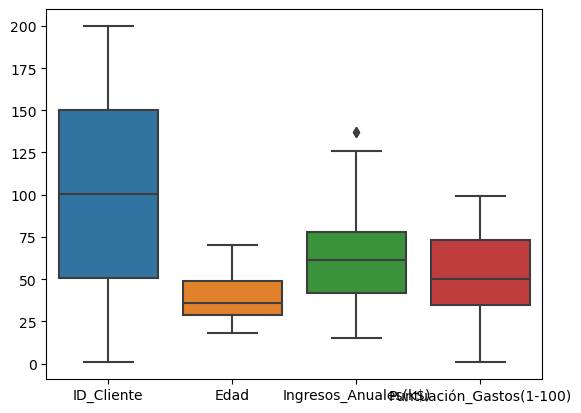

In [6]:
#Identificación de Datos Faltantes y Atípicos
sns.boxplot(data=Datos)

### 2.Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 

In [7]:
# Revisión de datos faltantes
valores_faltantes = Datos.isnull().sum()

# Muestra las columnas que tienen datos faltantes junto con la cantidad
print("\033[1mDatos faltantes:\033[0m")
print(valores_faltantes)

Datos faltantes:
ID_Cliente                  0
Sexo                        0
Edad                        0
Ingresos_Anuales(k$)        0
Puntuación_Gastos(1-100)    0
dtype: int64


In [8]:
summary_statistics = Datos.describe()
print("Estadísticas Resumen:")
print(summary_statistics)

Estadísticas Resumen:
       ID_Cliente        Edad  Ingresos_Anuales(k$)  Puntuación_Gastos(1-100)
count  200.000000  200.000000            200.000000                200.000000
mean   100.500000   38.850000             60.560000                 50.200000
std     57.879185   13.969007             26.264721                 25.823522
min      1.000000   18.000000             15.000000                  1.000000
25%     50.750000   28.750000             41.500000                 34.750000
50%    100.500000   36.000000             61.500000                 50.000000
75%    150.250000   49.000000             78.000000                 73.000000
max    200.000000   70.000000            137.000000                 99.000000


In [9]:
#Revisión del tipo de datos y datos faltantes
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID_Cliente                200 non-null    int64 
 1   Sexo                      200 non-null    object
 2   Edad                      200 non-null    int64 
 3   Ingresos_Anuales(k$)      200 non-null    int64 
 4   Puntuación_Gastos(1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


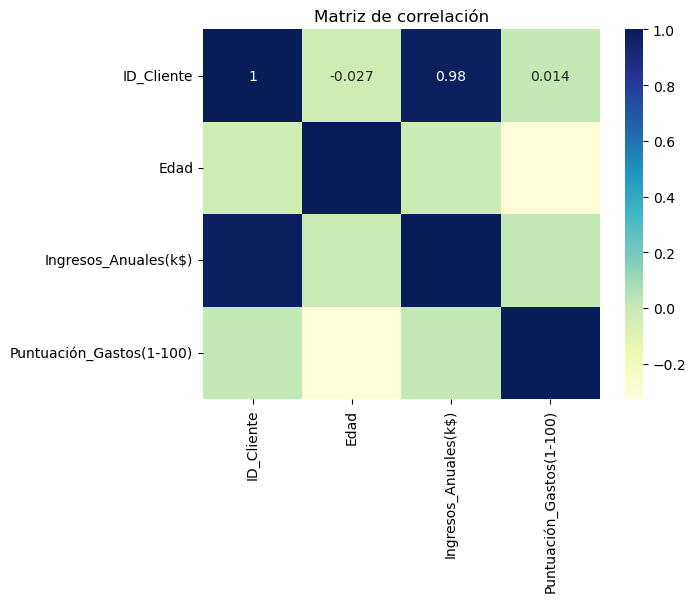

In [10]:
# Excluir columnas no numéricas de la matriz de correlación
columnas_numericas = Datos.select_dtypes(include=[np.number]).columns
correlation_matrix = Datos[columnas_numericas].corr()

# Mostrar la matriz de correlación como un mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title('Matriz de correlación')
plt.show()

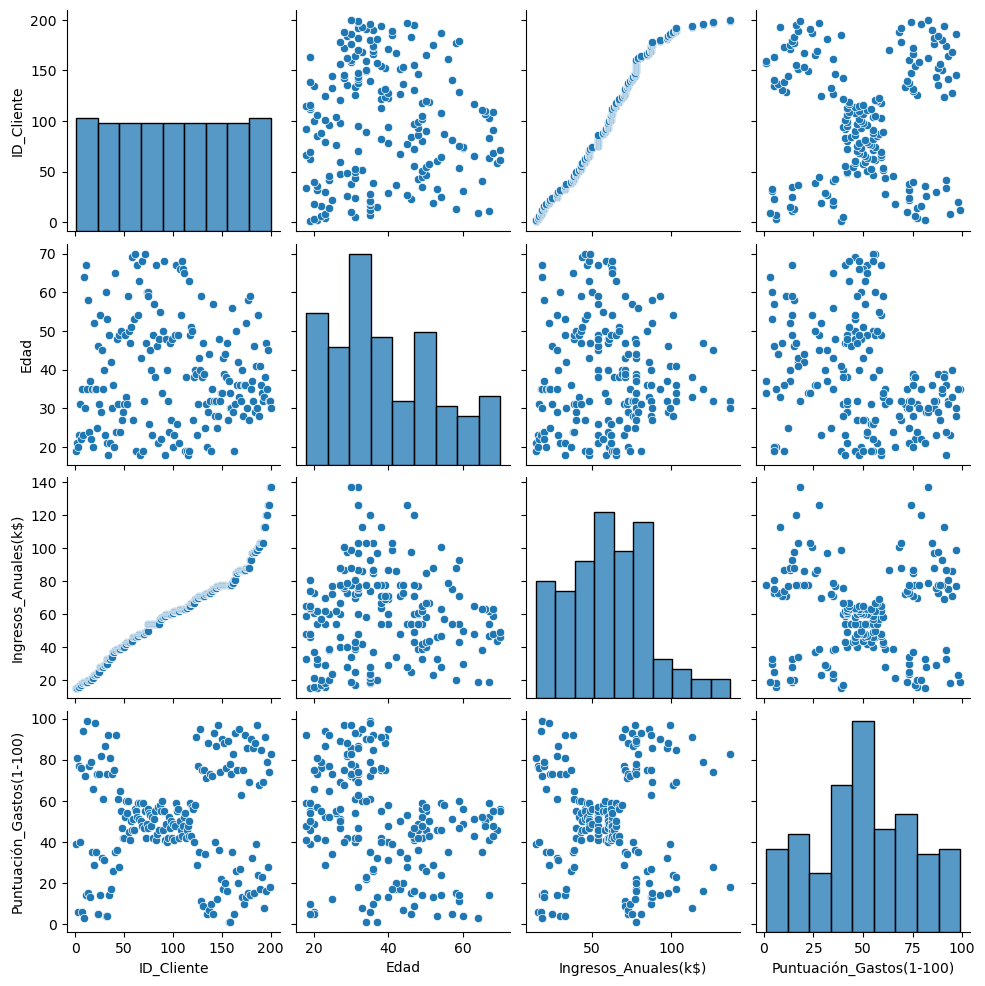

In [11]:
# Separate numeric columns
datos_numericos = Datos.select_dtypes(include=[np.number])

# Convertir valores infinitos a NaN en cada DataFrame
for df in [datos_numericos]:  
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Función para trazar una matriz de diagramas de dispersión para identificar relaciones entre variables
def plot_scatter_matrix(data):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)  # Ignorar FutureWarnings
        sns.pairplot(data)
    plt.show()

# Llamada a la función plot_scatter_matrix con el DataFrame de datos numéricos
plot_scatter_matrix(datos_numericos)

### 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

Característica de interes:

-Ingresos anuales segun edad 

-Puntuación de gastos

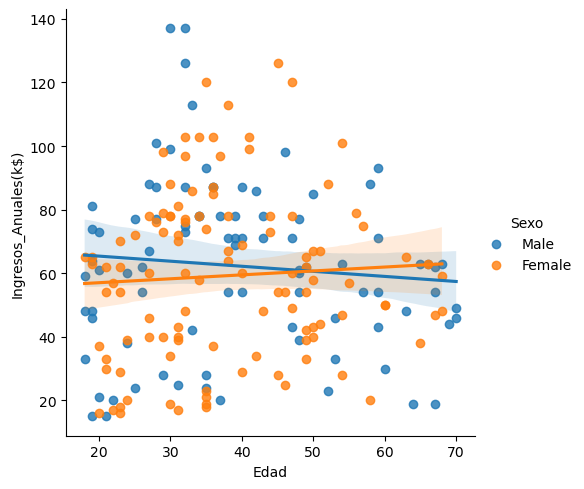

In [12]:
sns.lmplot(x="Edad", y="Ingresos_Anuales(k$)", data=Datos, hue="Sexo")

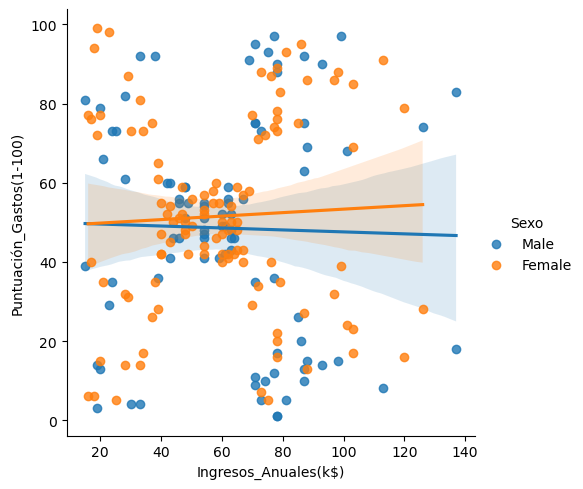

In [13]:
sns.lmplot(x = "Ingresos_Anuales(k$)", y = "Puntuación_Gastos(1-100)", data=Datos, hue = "Sexo")

#### Analisis
Con estos gráficos se puede evidenciar que las jovenes son mas propensos a gastar que mayores, siendo el genero de mujeres quienes gastan mas que los hombres. Adicionalmente se observa un mayor ingreso anual el cual esta vinculado a un puntaje de gasto más alto, particularmente para las mujeres. Parece que la mayoría de las personas se sitúan con ingresos decentes y un puntaje de gasto razonablemente elevado.

### 4.Entrenar el modelo configurando los diferentes hiperparámetros.

In [14]:
# Separar los datos en características (X) y variable objetivo (y)
X = Datos[['Edad']]
y = Datos['Ingresos_Anuales(k$)']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Predecir los ingresos anuales utilizando el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 450.4915900225752


In [15]:
#Modelo aglomerativo con los clusters identificados.
hier_clustering = AgglomerativeClustering(n_clusters=5)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([2, 2, 2, 2, 1, 2, 1, 2, 3, 1, 3, 1, 0, 2, 4, 2, 1, 2, 0, 1, 1, 2,
       0, 1, 0, 1, 0, 1, 4, 2, 0, 2, 0, 2, 0, 2, 4, 1, 1, 2, 3, 2, 0, 1,
       0, 2, 0, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 3, 2, 0, 3, 2, 3, 0, 3, 2,
       4, 3, 2, 1, 3, 0, 0, 0, 0, 2, 0, 4, 2, 0, 0, 4, 3, 0, 2, 0, 0, 2,
       1, 0, 3, 2, 0, 4, 1, 2, 0, 2, 0, 2, 2, 0, 3, 2, 0, 2, 3, 0, 3, 3,
       3, 2, 4, 2, 2, 2, 3, 0, 0, 0, 2, 4, 4, 4, 2, 1, 4, 4, 0, 4, 0, 4,
       2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 4, 4, 0, 4,
       0, 2, 4, 1, 1, 1, 0, 1, 2, 1, 0, 1, 4, 1, 1, 1, 4, 1, 1, 1, 0, 1,
       0, 2, 0, 1, 4, 1, 0, 1, 4, 1, 0, 1, 4, 1, 1, 1, 1, 4, 0, 1, 0, 1,
       1, 1], dtype=int64)

In [16]:
# Crear un modelo de árbol de decisiones
modelo_arbol = DecisionTreeRegressor(max_depth=3, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
modelo_arbol.fit(X_train, y_train)

# Predecir los ingresos anuales utilizando el conjunto de prueba
y_pred_arbol = modelo_arbol.predict(X_test)

# Calcular el error cuadrático medio
mse_arbol = mean_squared_error(y_test, y_pred_arbol)
print("Error cuadrático medio del árbol de decisiones:", mse_arbol)

Error cuadrático medio del árbol de decisiones: 471.4209028231571


### 5.Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.

In [17]:
# Desempeño del modelo con el Coeficiente de Silhouette el Índice de Calinski-Harabasz y el índice de Davies Bouldin Score
# Preparación de la metrica de la columna Grupo
Observaciones = len(Datos)
X = Datos.drop('Sexo', axis=1)
clusters = Datos['Sexo']

# Se calculan las métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+------------------------+
|          Metric          |         Value          |
+--------------------------+------------------------+
| Numero de Observaciones  |          200           |
|  Coeficiente Silhouette  | -0.0007418932175224252 |
| Indice Calinski Harabasz |   0.6568308709619952   |
|  Indice Davies Bouldin   |   15.426000705179082   |
+--------------------------+------------------------+


### 6.Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

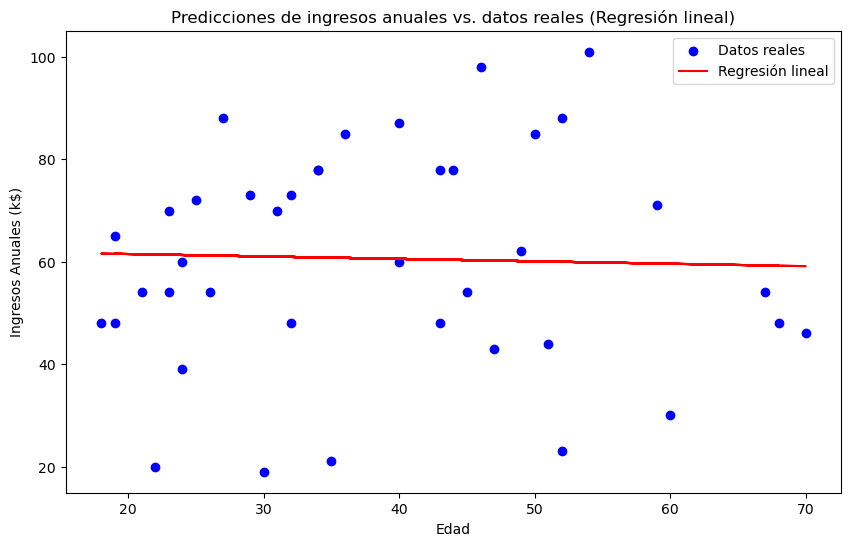

In [18]:
# Gráfico de dispersión con la línea de regresión lineal
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Regresión lineal')
plt.title('Predicciones de ingresos anuales vs. datos reales (Regresión lineal)')
plt.xlabel('Edad')
plt.ylabel('Ingresos Anuales (k$)')
plt.legend()
plt.show()

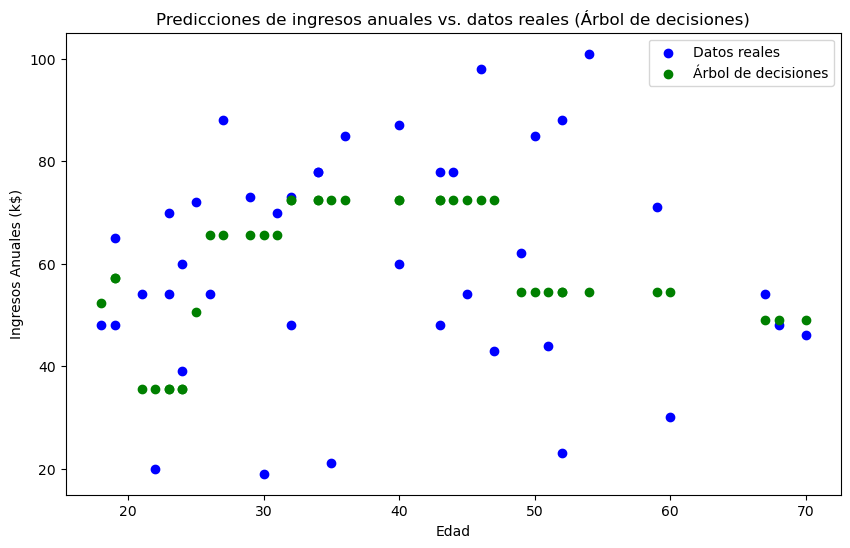

In [19]:
# Gráfico de dispersión con las predicciones del árbol de decisiones
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.scatter(X_test, y_pred_arbol, color='green', label='Árbol de decisiones')
plt.title('Predicciones de ingresos anuales vs. datos reales (Árbol de decisiones)')
plt.xlabel('Edad')
plt.ylabel('Ingresos Anuales (k$)')
plt.legend()
plt.show()

### 7.Interpretar, analizar y documentar los resultados obtenidos.

**Coeficiente de Silhouette:** La puntuación de Silhouette es de aproximadamente -0.0007, esto indica que los clusters tienen una superposición significativa o que los puntos de datos están muy cerca de los límites entre clusters. Esto puede hacer que la asignación de los puntos de datos a un cluster específico sea menos confiable o que los clusters no estén bien definidos.s.**

**Índice de Calinski-Harabasz:** La puntuación de Calinski Harabasz es d0.652 esto9indica que la dispersión entre los clusters es relativamente alta en comparación con la dispersión dentro de los clusters. 
El índice de Calinski-Harabasz se calcula como la relación entre la dispersión entre clusters y la dispersión dentro de los clusters. Una puntuación más alta indica una mayor separación entre los clusters y, por lo tanto, una mejor calidad del clustering. El puntaje máximo posible es infinito.

**
Indice Davies Bou*din**: La puntuación de Davies Bouldin15.40indica que los clusters tienen una dispersión relativamente alta y una separación insuficiente entre ellos. La puntuación de Davies-Bouldin mide la "bondad" del clustering basándose en la distancia entre los clusters y la dispersión dentro de los clusters.
Una puntuación más baja de Davies-Bouldin indica una mejor calidad del clustering, donde los clusters están más separados y más compactos. La puntuación mínima posible es cero, donde una puntuación de cero indica una perfecta separación entre cluste.os